# Mini-Project: Handwritten digit classifier using logistic regression.

In this mini project we're going to implement from scratch a one-vs-all logistic regression classifier for the MNIST digits dataset with a neural network mindset. The neural network aspect of this implementation is the use of a forward and backward propagation to claculate the value of the cost function and the partial derivatives of the cost function with respect to weights and the bias.

In this notebook, we'll recognizing the handwritten digits (0 to 9) using the famous digits data set from Scikit-Learn, using a classifier called Logistic Regression.

## Importing Library

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Dataset from openml

The **MNIST** database is a set of 70000 samples of handwritten digits where each sample consists of a grayscale image of size 28×28. There are a total of 70,000 samples. Dataset is available on many online platform or we can use dataset directly from openml from **sklearn.datasets** library.

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnist.target[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

## Plotting actual label using matplotlib

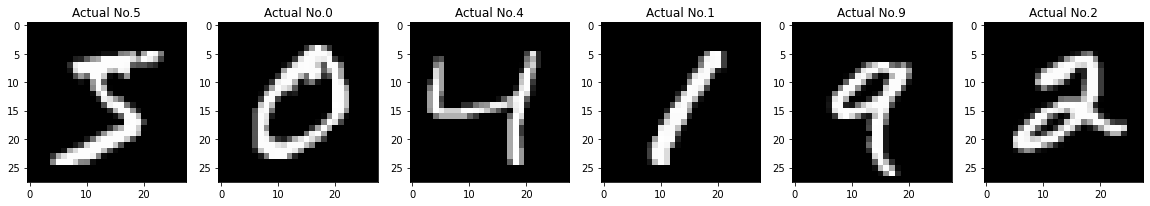

In [ ]:
plt.figure(figsize=(20,5))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(1, 6, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Actual No.%s" % label)

## Splitting data into train and test measuring prediction score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [ ]:
mdl = LogisticRegression(solver="lbfgs",max_iter=126)
mdl.fit(X_train,y_train)
prediction = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9192142857142858


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Accurcay is :",round(score,2)*100,"%")

Accurcay is : 92.0 %


prediction: 0


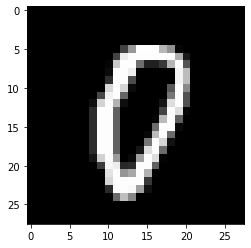

In [ ]:
index = 3
plt.imshow(np.reshape(X_test[index],(28,28)), cmap = "gray")
print("prediction: " + mdl.predict([X_test[index]])[0])

## Confusion matrix value and visualization

In [ ]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1307,    0,   10,    2,    7,    7,    5,    5,    9,    4],
       [   0, 1619,    5,    6,    1,    5,    2,    3,   13,    1],
       [   5,   11, 1282,   30,   11,    3,   24,   12,   32,    8],
       [   3,   10,   43, 1213,    2,   55,    3,   12,   37,   14],
       [   4,    4,    8,    1, 1287,    2,   14,   10,    8,   40],
       [  12,    6,   13,   53,   13, 1083,   23,    4,   45,   11],
       [   6,    3,   13,    0,   10,   24, 1301,    0,    3,    0],
       [   5,    4,   17,    8,   15,    4,    0, 1343,    7,   41],
       [   6,   32,   14,   36,    2,   36,   11,    3, 1181,   23],
       [   7,    9,    3,   18,   37,    7,    0,   45,   11, 1253]])

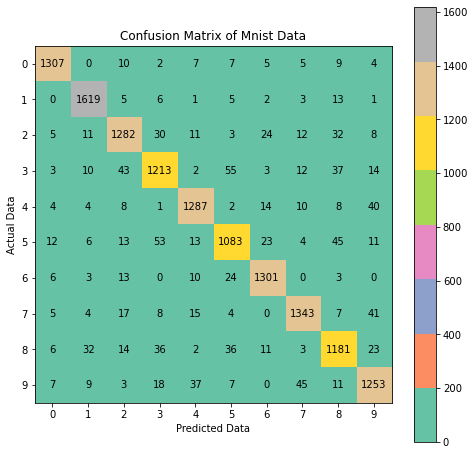

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap="Set2")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.colorbar()

plt.title("Confusion Matrix of Mnist Data")

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center',verticalalignment='center')